In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

%matplotlib inline

In [2]:
input_data

<module 'tensorflow.examples.tutorials.mnist.input_data' from '/Users/zyxue/Projects/sutton-barto-rl-exercises/berkeley-cs294/venv/lib/python3.5/site-packages/tensorflow/examples/tutorials/mnist/input_data.py'>

In [3]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x104e90438>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x10c94c438>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x102d44080>)

In [5]:
mnist.train.images.shape

(55000, 784)

In [6]:
mnist.test.images.shape

(10000, 784)

In [7]:
mnist.train.labels.sum(axis=0).tolist()

[5444.0,
 6179.0,
 5470.0,
 5638.0,
 5307.0,
 4987.0,
 5417.0,
 5715.0,
 5389.0,
 5454.0]

In [8]:
mnist.train.images[0].shape

(784,)

In [9]:
np.sqrt(784)

28.0

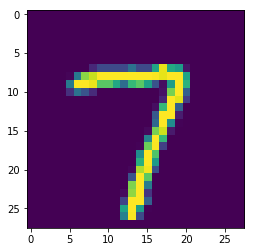

In [10]:
plt.imshow(mnist.train.images[100].reshape(28, 28))

In [11]:
sess = tf.InteractiveSession()

In [12]:
sess

In [13]:
x_plh = tf.placeholder(tf.float32, shape=[None, 784])
y_plh = tf.placeholder(tf.float32, shape=[None, 10])

In [14]:
W_var = tf.Variable(tf.zeros([784,10]))
b_var = tf.Variable(tf.zeros([10]))

In [15]:
sess.run(tf.global_variables_initializer())

In [16]:
y = tf.matmul(x_plh, W_var) + b_var

In [17]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_plh, logits=y))

In [18]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [19]:
train_step

<tf.Operation 'GradientDescent' type=NoOp>

In [20]:
for _ in range(1000):
    batch = mnist.train.next_batch(100)
    train_step.run(feed_dict={x_plh: batch[0], y_plh: batch[1]})

In [21]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_plh,1))

In [22]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [23]:
accuracy.eval(feed_dict={x_plh: mnist.test.images, y_plh: mnist.test.labels})

0.9181